# Modelos de crecimiento

En esta sesión veremos modelos continuos basados en ecuaciones diferenciales. Nos interesa modelar el crecimiento de una población en el tiempo.



## 1. Modelo de Malthus

El modelo de Malthus es el modelo de crecimiento mas sencillo. Llamaremos $X(t)$ a la población al tiempo $t$. Consideramos las siguientes hipótesis

* H1 La población crece de manera proporcional a su tamaño $\dot{X}(t)\propto X(t)$
* H2 La tasa de crecimiento es constante $\alpha$
* H3 La cantidad de recursos es ilimitada

La expresión matemática de este modelo es la siguiente ecuación diferencial

$$\dot{X}(t)=\alpha X(t)$$
con condición inicial

$$X(t_0)=X_0$$



Esta es una ecuación separable o de variables separables. Así que la ecuación diferencial que tenemos podemos escribirla equivalentemente como la ecuación integral:
$$
\int\dfrac{\mathrm{d}X}{X}=\alpha\int\mathrm{d}t
$$
cuya solución es 
$$
ln(X)=\alpha t + \cal{C}
$$
donde $\cal{C}$ es una constante arbitraria de  integración. Aplicando la exponencial en ambos lados de la ecuación obtenemos
$$
X(t)=e^{\alpha t}e^{\cal{C}}
$$
Ahora, utlizando las condiciones iniciales, tenemos:
$$
X_0=e^{\cal{C}}
$$

Así la ecuación que modela el crecimiento de poblaciones con las hipótesis H1-H3 es
$$
X(t)=X_0e^{\alpha t}
$$





## Malthus en Python


In [1]:
from numpy import *
from scipy.integrate import *
from matplotlib.pyplot import *


## Gráficas con matplolib

In [2]:
X_0=1000
a=0.4

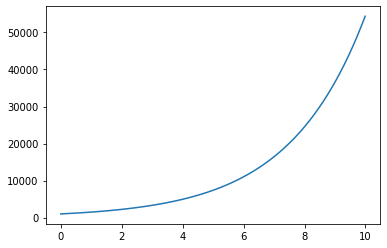

In [3]:
def f(t):
    return X_0*exp(a*t)
t=arange(0,10,0.01)
plot(t,f(t))

    

## Soluciones numéricas


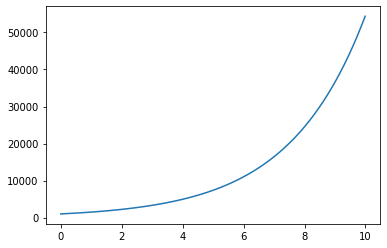

In [4]:
def g(x,t):
    return a*x
solucion=odeint(g,X_0,t)
plot(t,solucion)

Intentemos ahora para distintas condiciones iniciales:



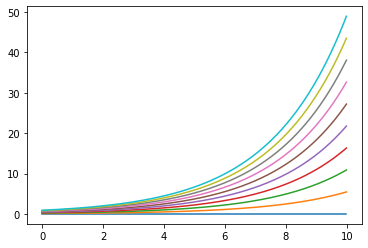

In [5]:
for X0 in arange(0,1,0.1):
    solucion=odeint(g,X0,t)
    plot(t,solucion)

# Modelo de crecimiento logístico

## El modelo de Malthus no es realista

El modelo de Malthus tiene distintos problemas de concepto:

* Supone crecimiento ilimitado de la población
* Supone que la pobolación se aproxima de forma continua
* 

## Capacidad de carga del sistema

Suponemos que el crecimiento de la población se vera limitado de forma ``natural'', es decir el agotamiento de los recursos limita de forma natural el crecimiento de la población, llamaremos capacidad de carga del sistema $K$ a la cantidad de individuos que el sistema es capaz de soportar. 


## La ecuación logística

$$
\dot{x}=\alpha x(\dfrac{K-x}{K})
$$


Observemos que esta ecuación tiene la forma
$$
\dot{x}=f(x,t;K)x(t)
$$

Es decir, tiene escencialmente la misma forma que nuestra primera ecuación que describe el crecimiento ilimitado, salvo que la tasa de crecimiento en este caso ya no es una constante sino una función de $x$ y $t$, no lineal con parámetro $K$.

Observemos que hay dos soluciones de equilibrio:
 
* $E_0\equiv 0$  y
* $E_1\equiv K$

Ahora, la solución podemos obtenerla de forma  sencilla, pues se trata de una ecuación separable. En efecto escribimos la ecuación integral equivalente:
$$
\int \frac{\mathrm{d}x}{x(1-\frac{x}{K})}=\alpha\int\mathrm{d}t
$$

Podemos hallar la solución para el lado izquierdo usando el metodo de fracciones parciales:
$$
\int \frac{\mathrm{d}x}{x(1-\frac{x}{K})}=\int\frac{\frac{1}{K}\mathrm{d}x}{x}+\int\frac{\mathrm{d}x}{1-\frac{x}{K}}
$$
o bien
$$
\int \frac{\mathrm{d}x}{x(1-\frac{x}{K})}=\int\frac{\mathrm{d}x}{Kx}+\int\frac{K\mathrm{d}x}{K-x}
$$
asi que:
$$
\int \frac{\mathrm{d}x}{x(1-\frac{x}{K})}=\frac{1}{K}\ln(x)-K\ln(1-\frac{x}{K})=\frac{1}{K}(\ln x-\ln (K-x))
$$
Entonces la solución de nuestra ecuación integral tiene la forma:
$$
\ln (\frac{x}{(K-x)}=K(t+\mathcal{C})
$$
donde $\mathcal{C}$ es una constante. Ahora, aplicando la exponencial en ambos lados de la ecuación tenemos:
$$
\frac{x}{K-x}=\mathcal{C}_2\mathrm{e}^{Kt}
$$
o bien
$$
(1-\mathcal{C}_2\mathrm{e}^{Kt})x=K\mathcal{C}_2\mathrm{e}^{Kt}
$$
es decir:
$$
x(t)=\frac{K\mathcal{C}_2\mathrm{e}^{Kt}}{(1-\mathcal{C}_2\mathrm{e}^{Kt})}
$$
La constante $\mathcal{C}_2$ se obtiene mediante las condiciones iniciales. En efecto si $x(0)=x_0$, ternemos que:
$$
x_0=\frac{K\mathcal{C}_2}{(1-\mathcal{C}_2)}
$$
por lo tanto
$$
\mathcal{C}_2=\frac{x_0}{K-x_0}
$$

 
 Por otro lado en el comportamiento asintóticos de las soluciones se observa que:
* Para $K=x_0$, la solución es estacionaria $x\equiv K$
* Para $K>x_0$, la solución se aproxima asintóticamente a $E_1$
* Para $K<x_0$, la solución se aleja de $E_0$ y se aproxima asintóticamente a $E_1$


## Solución numérica

In [11]:
def logistica(x,t,K):
    return a*x*(1-(x/K))

Gráfica para $K=20$, y $ x_0=18$

In [23]:
X_0=18
sol_log=odeint(logistica,X_0,t,args=(20,))

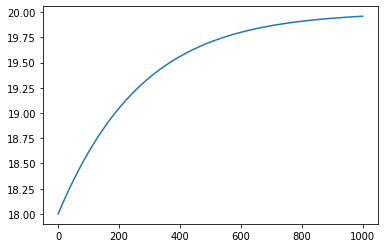

In [24]:
plot(sol_log)

Gráfica para $K=20$, y $ x_0=21$

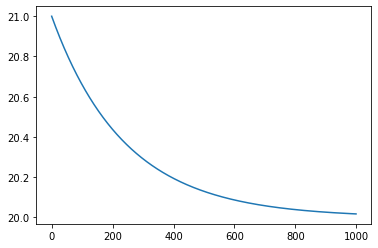

In [25]:
X_0=21
sol_log=odeint(logistica,X_0,t,args=(20,))
plot(sol_log)

## Para varias condiciones iniciales


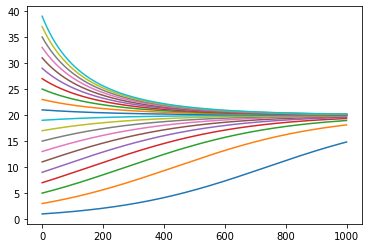

In [32]:
for X_0 in arange(1,40,2):
    sol_log=odeint(logistica,X_0,t,args=(20,))
    plot(sol_log)